**This notebook is dedicated to show the training process for the Linear Regression Model**

In [3]:
from src import data_utils, preprocessing
import matplotlib.pyplot as plt
import numpy as np

Only run the cell below by removing the # symbol if you haven't downloaded the zones data

In [4]:
# run this cell to download the required data files containing the trip and zones information

# data_utils.download_zones_data('https://d37ci6vzurychx.cloudfront.net/misc/taxi_zones.zip')

In [5]:
# first we get our cleaned data set
df_og = data_utils.clean_trip_data('yellow_tripdata_2022-05.parquet')

In [6]:
# now we get our X, and ys
X, y_travel_time, y_fare_amount = data_utils.get_feature_target(df_og)

In [7]:
# and we then get our training and testing sets
# we are going to get two sets of y labels, one for travel_time and another for fare_amount
X_train, X_test, y_train_travel_time, y_test_travel_time, y_train_fare_amount, y_test_fare_amount = data_utils.get_train_test_sets(X, y_travel_time, y_fare_amount)

In [8]:
# we can further split the training set into training and validation
X_train, X_val, y_train_travel_time, y_val_travel_time, y_train_fare_amount, y_val_fare_amount = data_utils.get_train_test_sets(X_train, y_train_travel_time, y_train_fare_amount)

In [9]:
# now using the training, validation, and testing sets we can preprocess our data
X_train, X_val, X_test = preprocessing.preprocess_data(X_train, X_val, X_test)

Input train data shape:  (2160964, 10)
Input val data shape:  (540242, 10)
Input test data shape:  (675302, 10) 



In [10]:
column_names_order = ['PULocationID','DOLocationID','improvement_surcharge','congestion_surcharge','airport_fee','day','month','is_weekend','distance_between_zones','morning','afternoon','night']

**Initial Results with no finetuning**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [12]:
#FARE AMOUNT LINEAR REGRESSION
fare_amount_logreg = LinearRegression()
fare_amount_logreg.fit(X_train, y_train_fare_amount)

LinearRegression()

In [ ]:
preds_fare_logreg = fare_amount_logreg.predict(X_val)
# measure the results
# measure our results
r2_fare = r2_score(y_val_fare_amount, preds_fare_logreg)
mae = mean_absolute_error(y_val_fare_amount, preds_fare_logreg)
rmse = rmse = root_mean_squared_error(y_val_fare_amount, preds_fare_logreg)

print(f'R2 score: {r2_fare}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R2 score: 0.5121361073180513
Mean Absolute Error: 2.918443626086316
Root Mean Squared Error: 11.070519923168918


In [14]:
#TRAVEL TIME LINEAR REGRESSION
travel_time_logreg = LinearRegression()
travel_time_logreg.fit(X_train, y_train_travel_time)

LinearRegression()

In [15]:
preds_travel_logreg = travel_time_logreg.predict(X_val)
# measure the results
r2_travel_time = r2_score(y_val_travel_time, preds_travel_logreg)
mae = mean_absolute_error(y_val_travel_time, preds_travel_logreg)
rmse = root_mean_squared_error(y_val_travel_time, preds_travel_logreg)

print(f'R2 score: {r2_travel_time}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R2 score: 0.675251215315447
Mean Absolute Error: 302.1365121446657
Root Mean Squared Error: 458.4192565850131


**Fine tuning for Linear Regression**

In [16]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
param_grid = {
    'fit_intercept': [True, False],
}

In [22]:
fare_amount_lr = LinearRegression()

In [23]:
random_search_fare = RandomizedSearchCV(
    estimator=fare_amount_lr,
    param_distributions=param_grid,
    n_iter=10,
    scoring='r2',
    cv=5,
    random_state=42
)

In [24]:
random_search_fare.fit(X_train, y_train_fare_amount)

c:\Users\MSI-A520-PRO512\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False]},
                   random_state=42, scoring='r2')

In [25]:
random_pred_fare = random_search_fare.predict(X_val)

In [26]:
r2_fare_opt = r2_score(y_val_fare_amount, random_pred_fare)
mae = mean_absolute_error(y_val_fare_amount, random_pred_fare)
rmse = root_mean_squared_error(y_val_fare_amount, random_pred_fare)

print(f'R2 score: {r2_fare_opt}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

R2 score: 0.5121361073180353
Mean Absolute Error: 2.9184436260462605
Root Mean Squared Error: 11.0705199231691


In [27]:
#Now for travel time
random_search_travel = RandomizedSearchCV(
    estimator=travel_time_logreg,
    param_distributions=param_grid,
    n_iter=10,
    scoring='r2',
    cv=5,
    random_state=42
)

In [28]:
random_search_travel.fit(X_train, y_train_travel_time)

c:\Users\MSI-A520-PRO512\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False]},
                   random_state=42, scoring='r2')

In [29]:
random_pred_travel = random_search_travel.predict(X_val)

In [30]:
r2_travel_opt = r2_score(y_val_travel_time, random_pred_travel)
mae_travel = mean_absolute_error(y_val_travel_time, random_pred_travel)
rmse_travel = root_mean_squared_error(y_val_travel_time, random_pred_travel)

print(f'R2 score: {r2_travel_opt}')
print(f'Mean Absolute Error: {mae_travel}')
print(f'Root Mean Squared Error: {rmse_travel}')

R2 score: 0.6752512153154784
Mean Absolute Error: 302.1365121457671
Root Mean Squared Error: 458.41925658499093


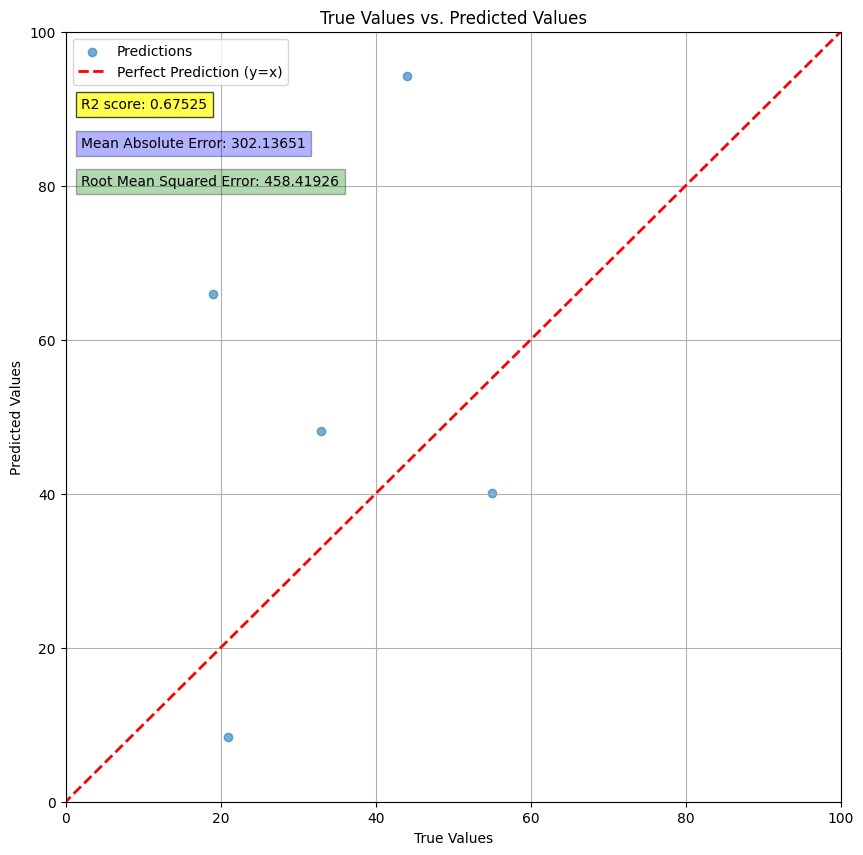

In [31]:
# plot the differences
plt.figure(figsize=(10,10))
plt.scatter(y_val_travel_time[:10000], random_pred_travel[:10000], alpha=0.6, label='Predictions')
# axis limits
plt.xlim([0,100])
plt.ylim([0,100])
#plotting perfect line
min_val = min(np.min(y_val_travel_time), np.min(random_pred_travel))
max_val = max(np.max(y_val_travel_time), np.max(random_pred_travel))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction (y=x)')
# other settings
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values")
plt.grid(True)
plt.legend()
plt.text(2,90,f'R2 score: {r2_travel_opt:.5f}',bbox=dict(facecolor='yellow', alpha=0.7))
plt.text(2,85,f'Mean Absolute Error: {mae_travel:.5f}',bbox=dict(facecolor='blue', alpha=0.3))
plt.text(2,80,f'Root Mean Squared Error: {rmse_travel:.5f}',bbox=dict(facecolor='green', alpha=0.3))
plt.show()